## **QRCoce com Python**

In [61]:
DECLARE @pscript NVARCHAR(MAX);

/* 1 Importar os módulos python */
-- Instalar módulos no SQL Server
-- pandas, pyqrcode

SET @pscript = N'

import pandas as pd                  # importar para criar o dataframe
import pyqrcode as qr                # importar para gerar QRCOde

'


/* 2. Definir URL e Criar Código QR*/

SET @pscript = @pscript + N'

url = "https://www.youtube.com/c/fabioms?sub_confirmation=1" #URL da inscrição do canal
codigo = qr.create(url)

'

/* 3. Converter Imagem em Texto */

SET @pscript = @pscript + N'


imagem_texto = codigo.png_as_base64_str(scale=1)
imagem_html = "data:image/png;base64,{}".format(imagem_texto)

'



/* 4. Exportar resultado para Dataframe */

SET @pscript = @pscript + N'

table_data = pd.DataFrame([["Fabio Menezes Santos", imagem_html]])
OutputDataSet = table_data

'

INSERT INTO QRCODE_URL
Execute sp_execute_external_script 
@language = N'Python', 
@script = @pscript



STDERR message(s) from external script: 
C:\Program Files\Microsoft SQL Server\MSSQL15.MSSQLSERVER\PYTHON_SERVICES\lib\site-packages\revoscalepy\functions\RxSummary.py:4: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
 from pandas import DataFrame, Index, Panel

(1 row affected)

Total execution time: 00:00:10.872

## **Consultar Tabela "QRCODE\_URL"**

(1 row affected)

Total execution time: 00:00:00.003

Nome,QRCodigo
Fábio Menezes,

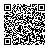

In [62]:
SELECT * FROM QRCODE_URL